## Visualización COVID

Basado en el estudio de https://github.com/therealcyberlord

Analisis de los datos de la expansión del último coronavirus (SARS-CoV-2) llamado por la OMS oficialmente COVID-19, un virus respiratorio altamente contagioso que apareció en Wuhan en Diciembre del 2019. 

- Data: https://github.com/CSSEGISandData/COVID-19 Repositorio propiedad de Johns Hopkins..
- Enlace al artículo sobre el COVID-19 en la OMS  https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- Enlace al artículo en el CDC https://www.cdc.gov/coronavirus/2019-ncov
- visualización de los datos con ARCGIS https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

<img src='https://newsfortomorrow.com/wp-content/uploads/2020/01/1578562454_Wuhan-pneumonia-New-coronavirus-related-to-SARS-idenitified.jpg'>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates 
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

## Carga online de los datos
Los cargamos a partir del repositorio de Johns Hopkins en git

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


### Gráfica con la evolución de contagios en España

In [3]:
# Me quedo con las fechas nada mas, de la columna 4 en adelante. Las usaré de pie de gráficos por claridad
cols = confirmed_df.columns
col_fechas_ind = cols[4:]

#las paso a fecha
x_values = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in col_fechas_ind.values]

In [43]:
# chequeo españa
esp_confirmed = confirmed_df[confirmed_df["Country/Region"]=="Spain"].loc[:, col_fechas_ind]
esp_confirmed_y = esp_confirmed.values[0]

esp_total_deaths = deaths_df[deaths_df["Country/Region"]=="Spain"].loc[:, col_fechas_ind].values[0]
esp_total_recovery = recoveries_df[recoveries_df["Country/Region"]=="Spain"].loc[:, col_fechas_ind].values[0]


In [52]:

esp_mortality_rate = []

# totalizamos en un array los ratios
for i in range(len(esp_total_deaths)):
    if (esp_confirmed_y[i] == 0):
        esp_mortality_rate.append(0)
    else:    
        esp_mortality_rate.append(esp_total_deaths[i]/esp_confirmed_y[i])


In [74]:
esp_tasa_crecimiento = []

for i in range(len(esp_confirmed_y)):
    if i>0 :
        esp_tasa_crecimiento.append (esp_confirmed_y[i]-esp_confirmed_y[i-1])
    else :
        esp_tasa_crecimiento.append(0)

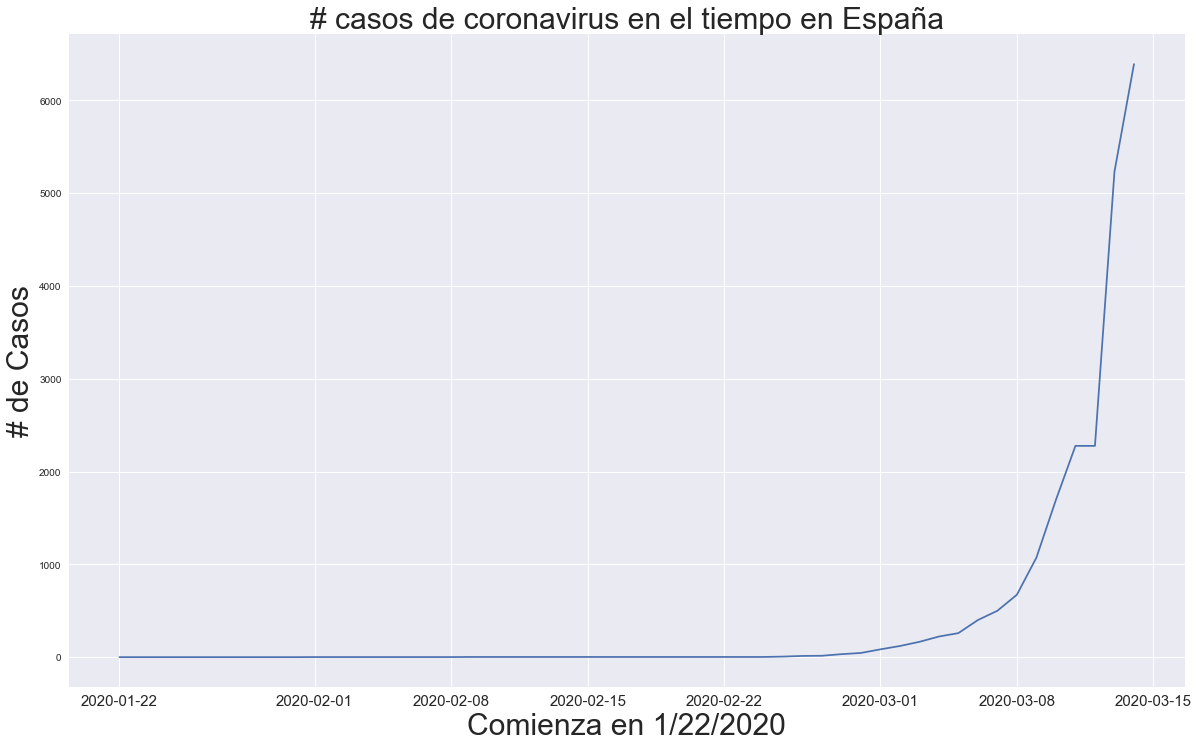

In [56]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_confirmed_y)
plt.title('# casos de coronavirus en el tiempo en España', size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

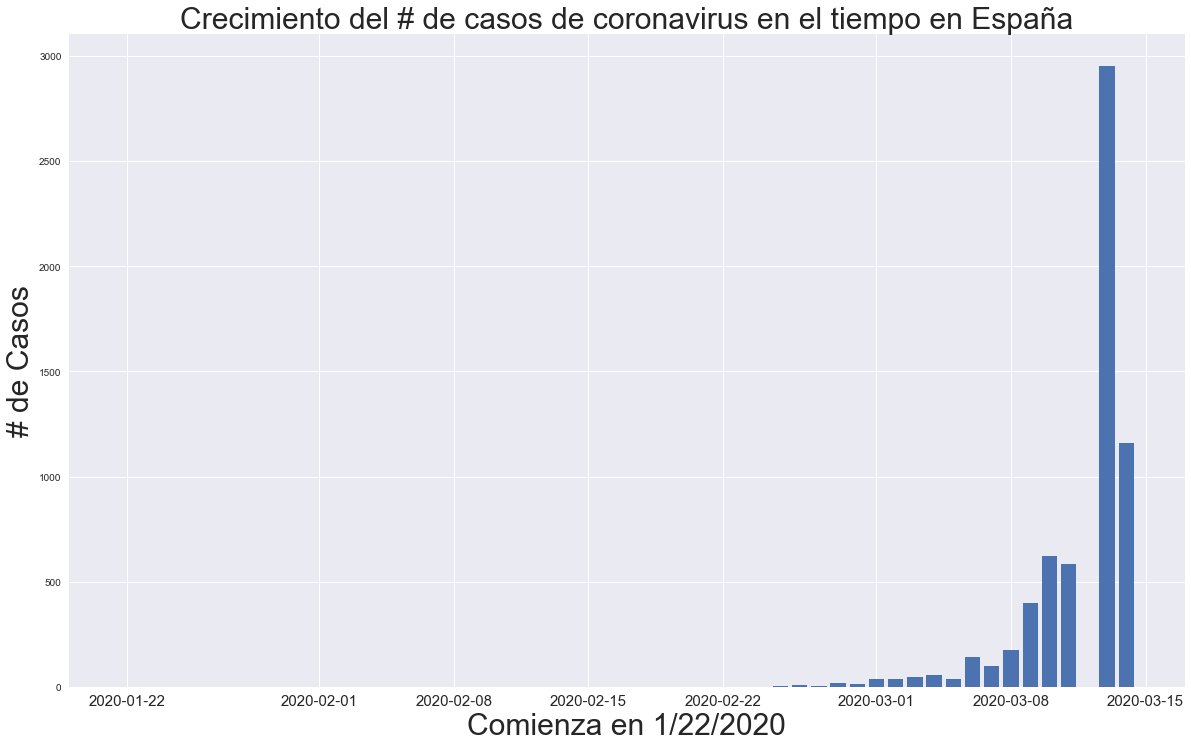

In [77]:
plt.figure(figsize=(20, 12))
plt.bar(x_values, esp_tasa_crecimiento)
plt.title('Crecimiento del # de casos de coronavirus en el tiempo en España', size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

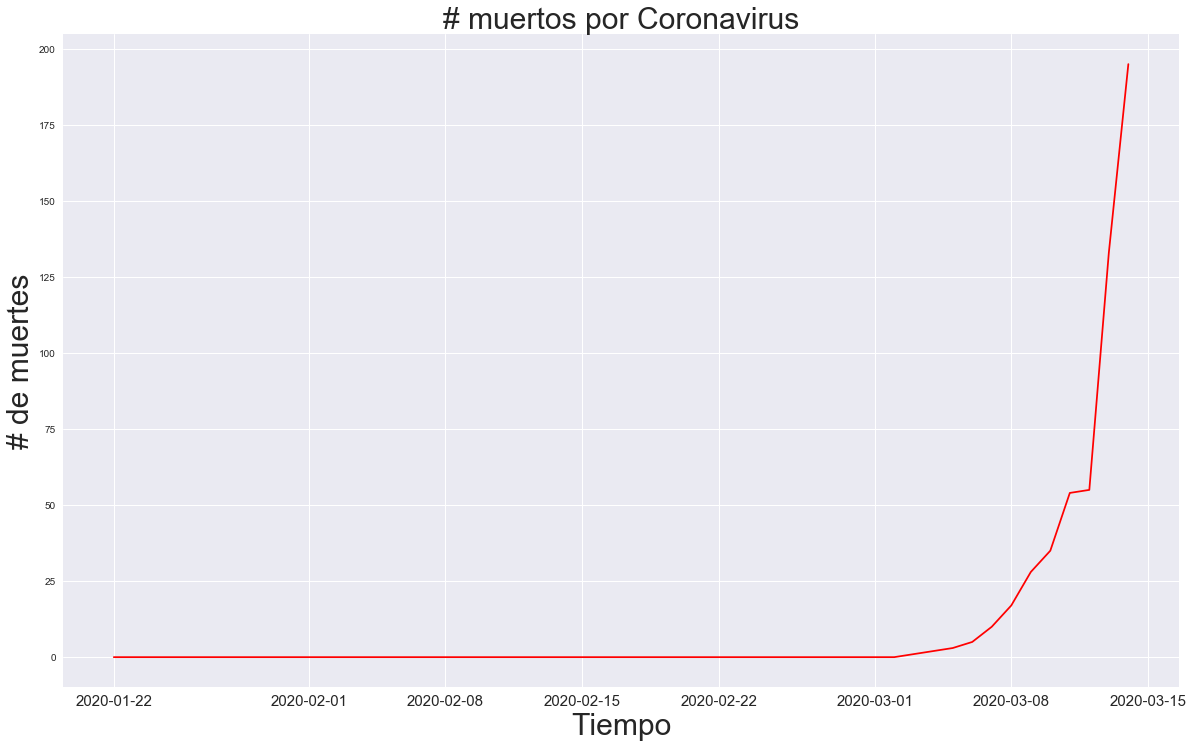

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='red')
plt.title('# muertos por Coronavirus', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=15)
plt.show()

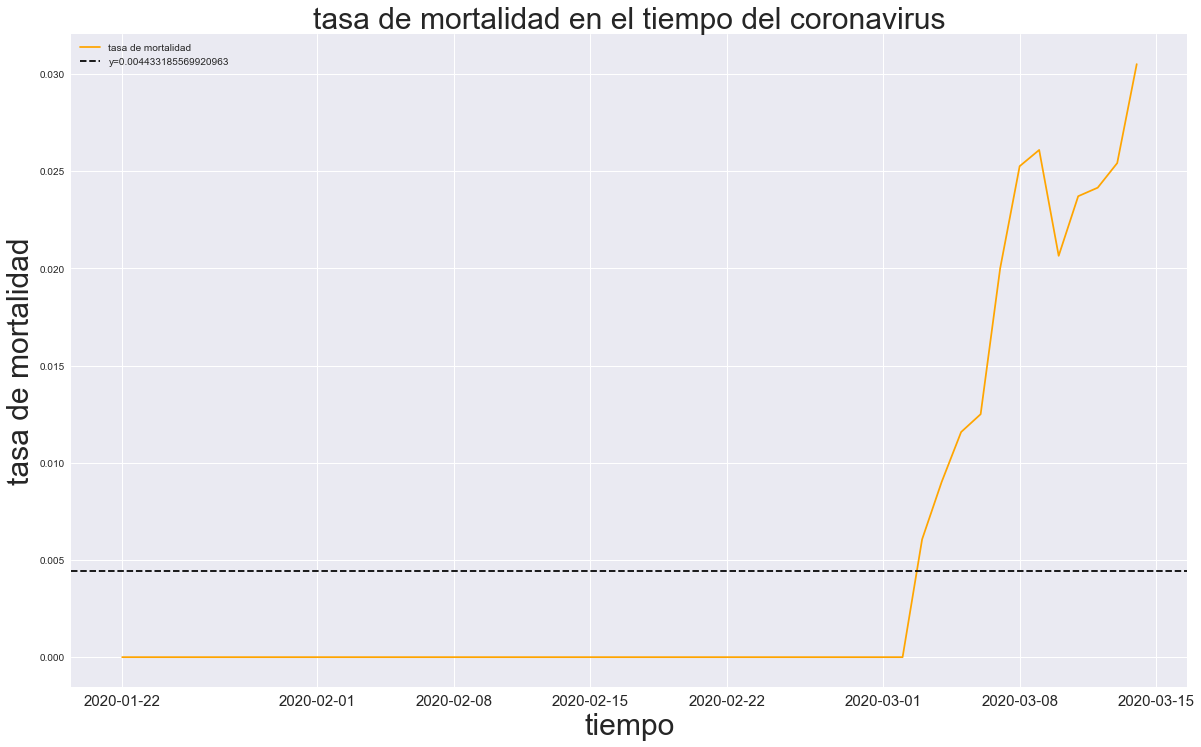

In [54]:
esp_mean_mortality_rate = np.mean(esp_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_mortality_rate, color='orange')
plt.axhline(y = esp_mean_mortality_rate,linestyle='--', color='black')
plt.title('tasa de mortalidad en el tiempo del coronavirus', size=30)
plt.legend(['tasa de mortalidad', 'y='+str(esp_mean_mortality_rate)])
plt.xlabel('tiempo', size=30)
plt.ylabel('tasa de mortalidad', size=30)
plt.xticks(size=15)
plt.show()


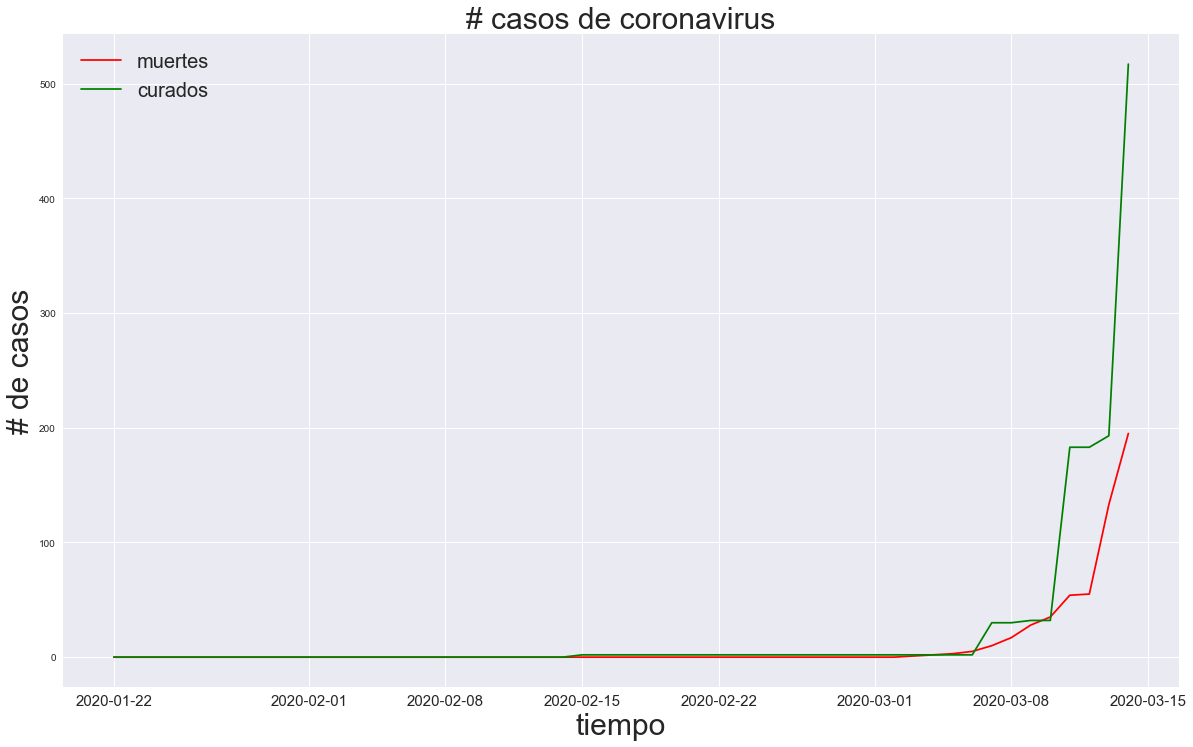

In [55]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='r')
plt.plot(x_values, esp_total_recovery, color='green')
plt.legend(['muertes', 'curados'], loc='best', fontsize=20)
plt.title('# casos de coronavirus', size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()


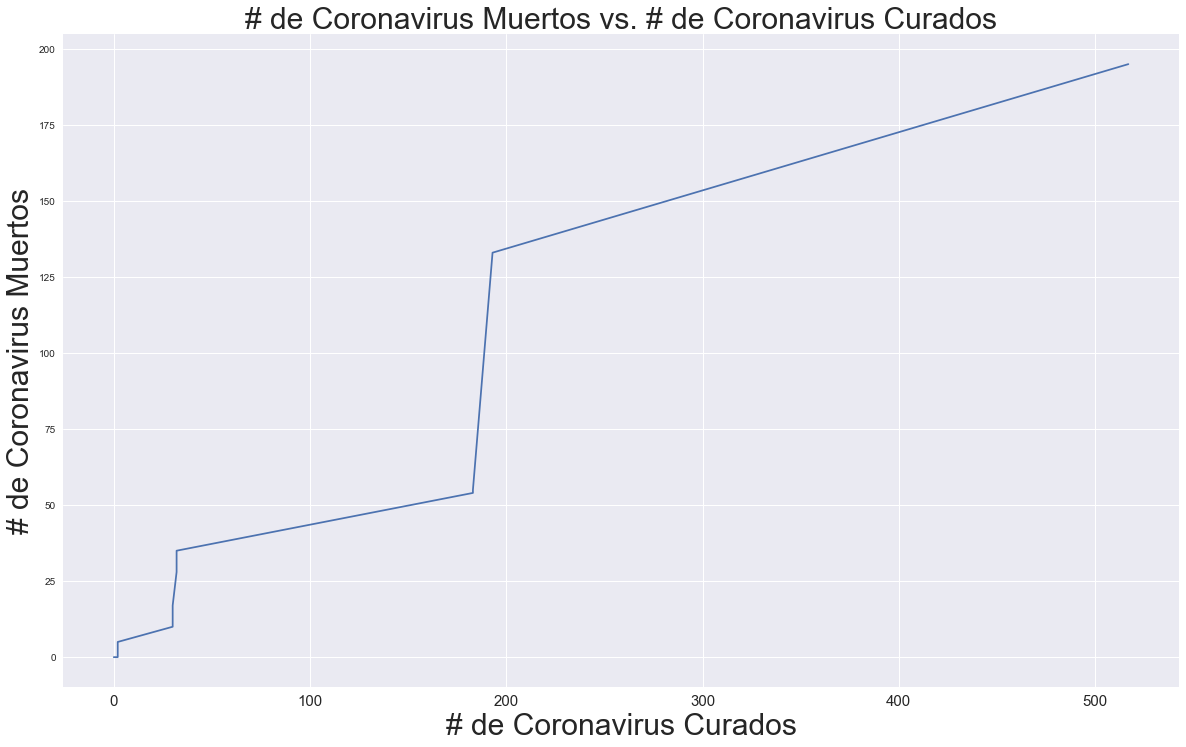

In [58]:
plt.figure(figsize=(20, 12))
plt.plot(esp_total_recovery, esp_total_deaths)
plt.title('# de Coronavirus Muertos vs. # de Coronavirus Curados', size=30)
plt.xlabel('# de Coronavirus Curados', size=30)
plt.ylabel('# de Coronavirus Muertos', size=30)
plt.xticks(size=15)
plt.show()

## Estudio global

Me quedo con los datos numéricos nada más, asi que cojo solo las col_fechas_ind.

In [8]:
confirmed = confirmed_df.loc[:, col_fechas_ind]
deaths = deaths_df.loc[:, col_fechas_ind]
recoveries = recoveries_df.loc[:, col_fechas_ind]

Creamos arrays  con todo

In [32]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

# totalizamos en un array los resultados
for i in col_fechas_ind:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


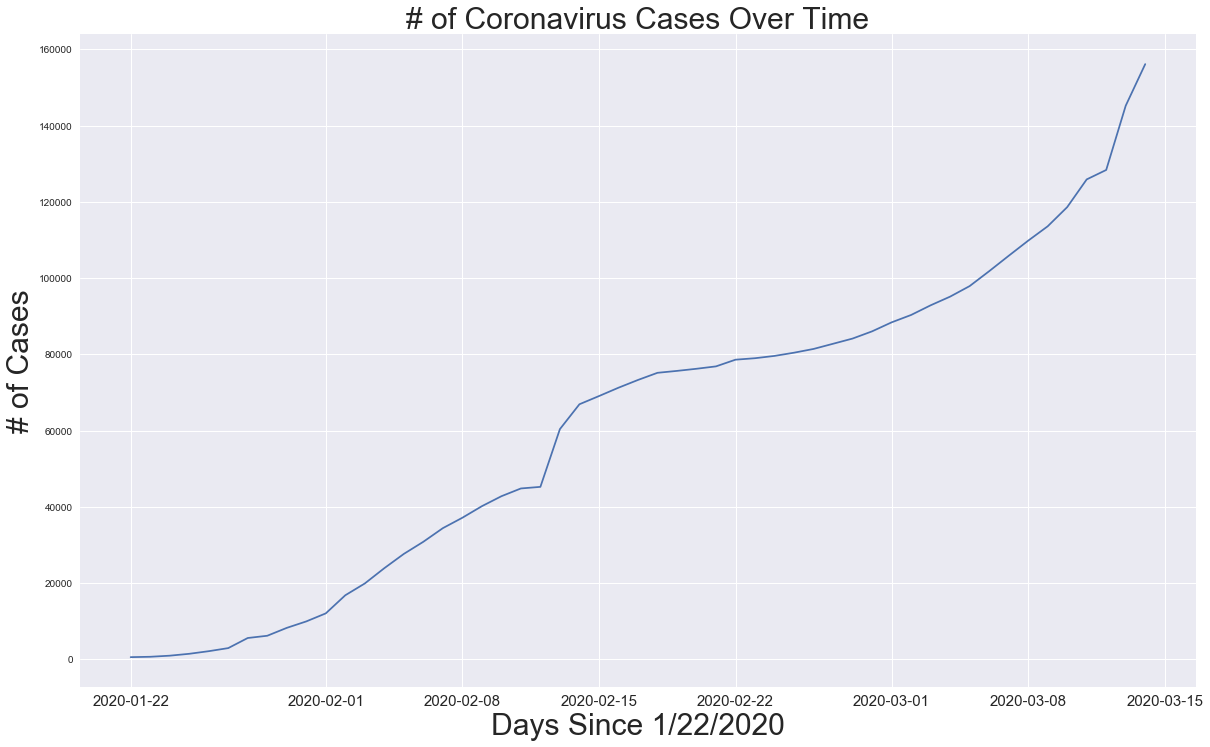

In [11]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

Representaremos el númerode casos confirmados, recuperaciones, muertes y ratio de mortalidad a través del tiempo.

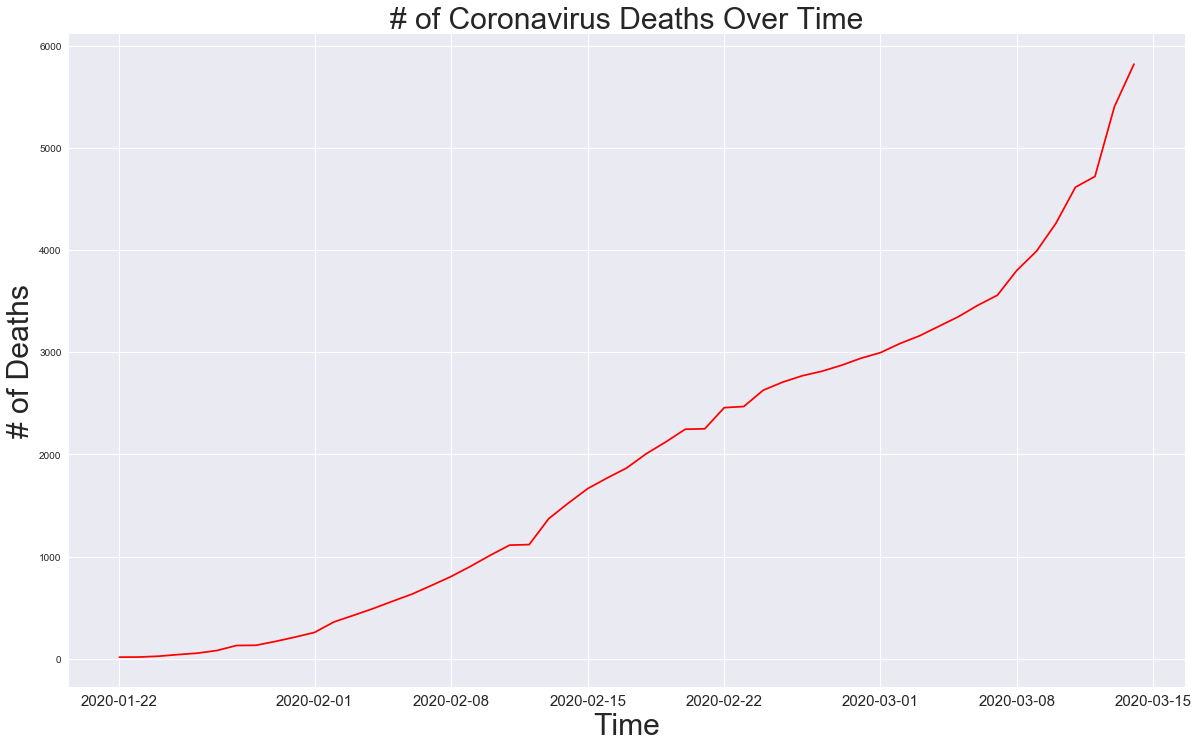

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=15)
plt.show()

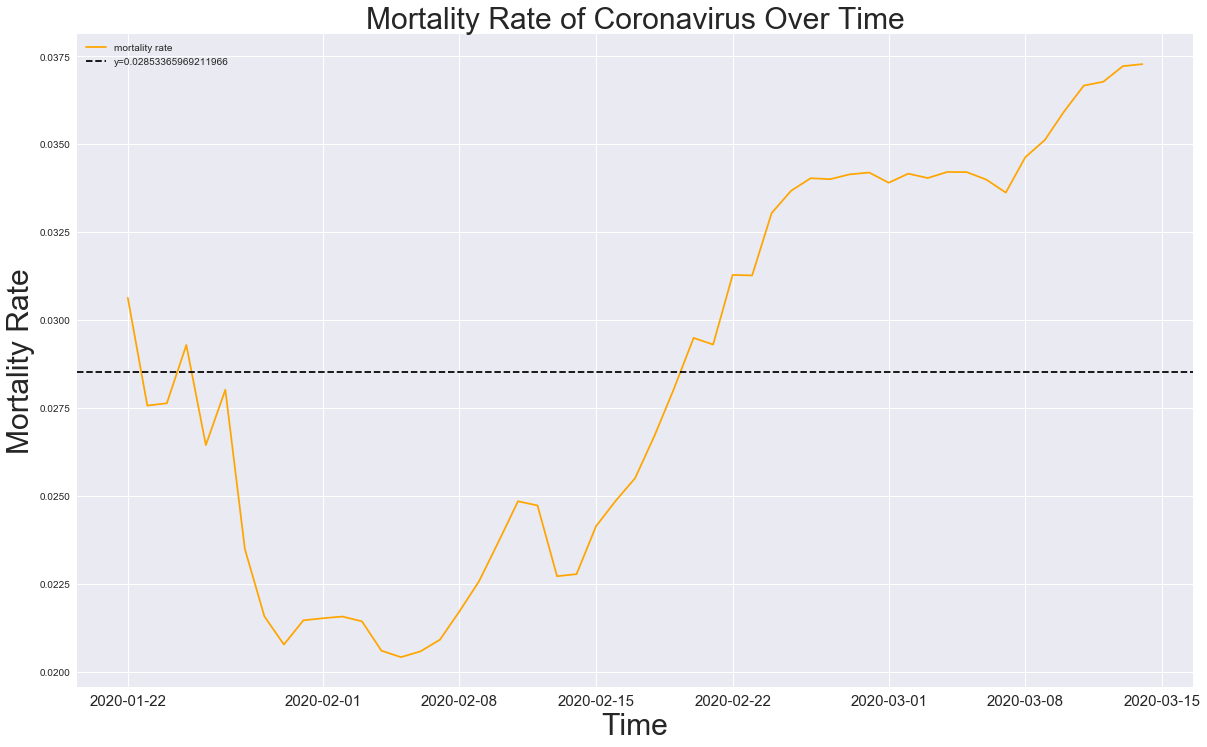

In [13]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

Graphing the number of deaths and the number of recoveries

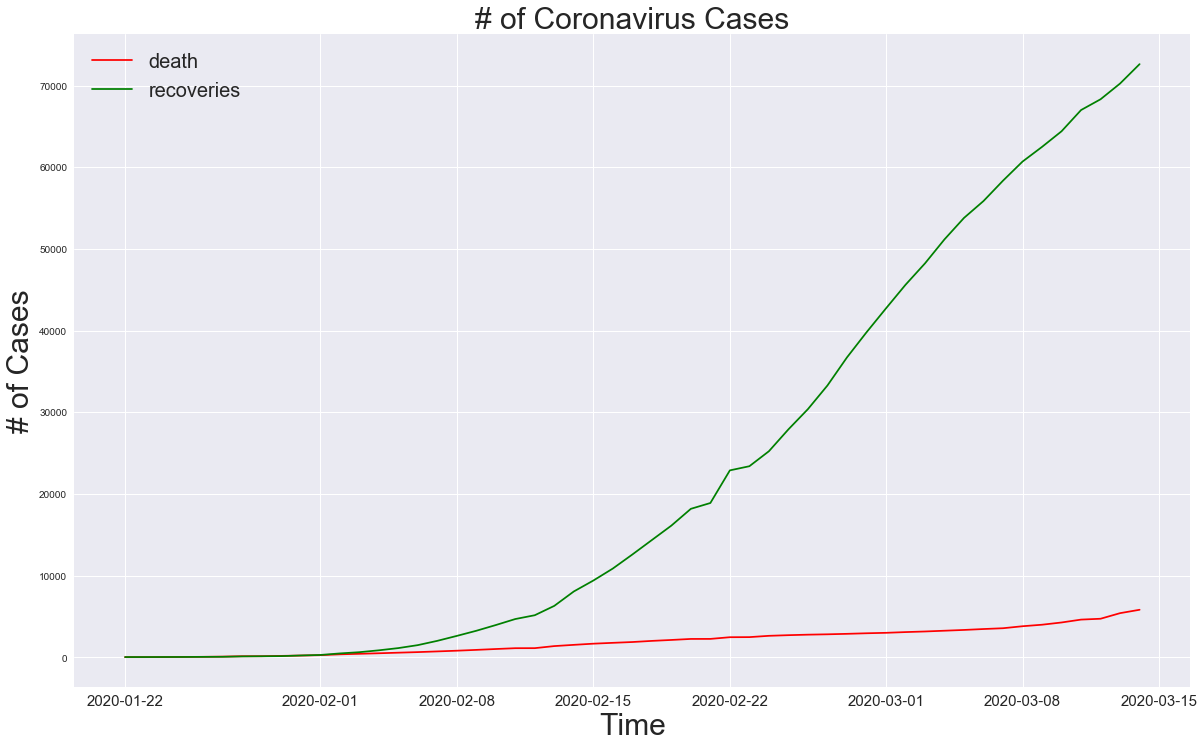

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='r')
plt.plot(x_values, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()





Plotting deaths vs recoveries

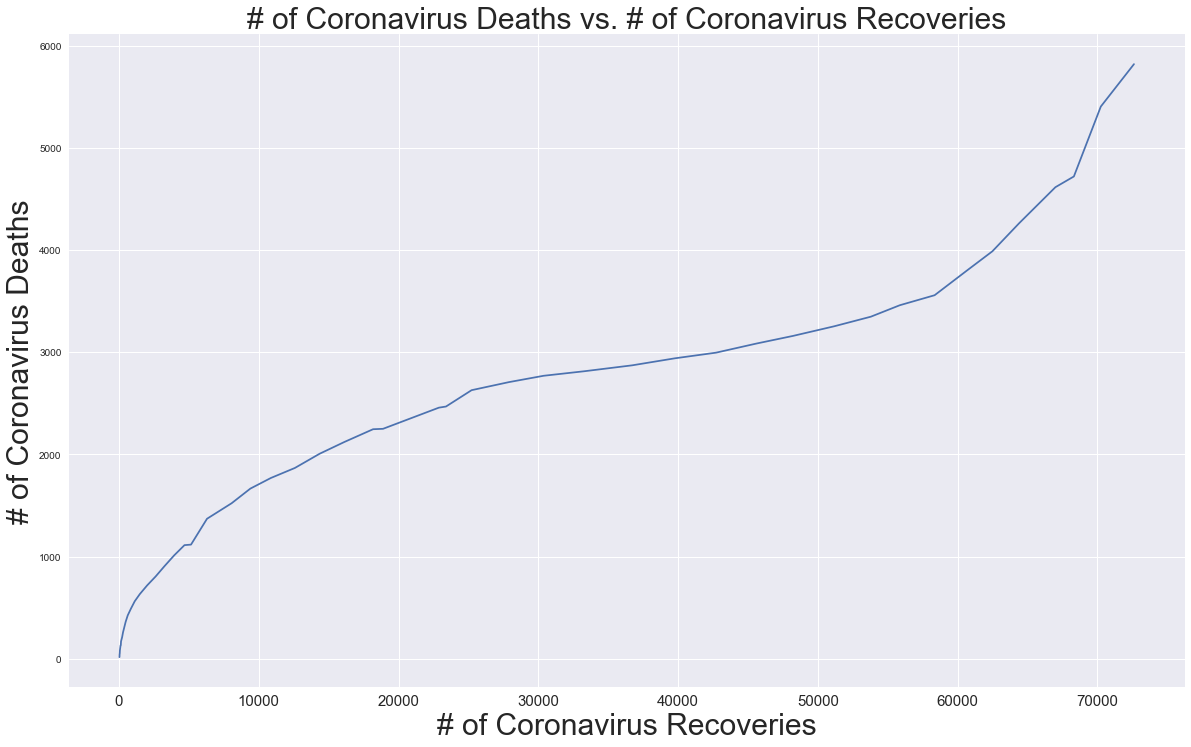

In [14]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [16]:
latest_confirmed = confirmed_df[col_fechas_ind[-1]]
latest_deaths = deaths_df[col_fechas_ind[-1]]
latest_recoveries = recoveries_df[col_fechas_ind[-1]]

Getting information about countries/regions that have confirmed coronavirus cases

In [17]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [18]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [19]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 80977 cases
Italy: 21157 cases
Iran: 12729 cases
Korea, South: 8086 cases
Spain: 6391 cases
Germany: 4585 cases
France: 4480 cases
US: 2727 cases
Switzerland: 1359 cases
United Kingdom: 1143 cases
Norway: 1090 cases
Sweden: 961 cases
Netherlands: 959 cases
Denmark: 836 cases
Japan: 773 cases
Cruise Ship: 696 cases
Belgium: 689 cases
Austria: 655 cases
Qatar: 337 cases
Australia: 250 cases
Malaysia: 238 cases
Greece: 228 cases
Finland: 225 cases
Singapore: 212 cases
Bahrain: 210 cases
Canada: 198 cases
Israel: 193 cases
Czechia: 189 cases
Slovenia: 181 cases
Portugal: 169 cases
Iceland: 156 cases
Brazil: 151 cases
Ireland: 129 cases
Romania: 123 cases
Estonia: 115 cases
Philippines: 111 cases
Iraq: 110 cases
Egypt: 109 cases
Kuwait: 104 cases
Saudi Arabia: 103 cases
Poland: 103 cases
India: 102 cases
Indonesia: 96 cases
Lebanon: 93 cases
United Arab Emirates: 85 cases
Thailand: 82 cases
San Marino: 80 cases
Chile: 61 cases
Russia: 59 cases
Ta

In [20]:
unique_provinces =  list(confirmed_df['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

### Actualizando los datos
Con los últimos datos presentes preparamos varias gráficas agrupadas

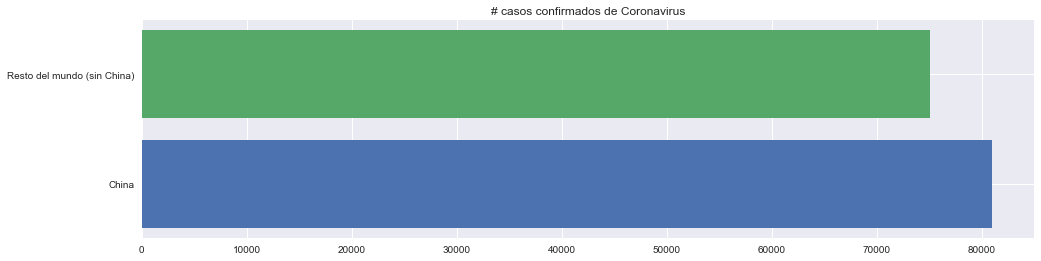

In [21]:
china_confirmed = latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 4))
plt.barh('China', china_confirmed)
plt.barh('Resto del mundo (sin China)', outside_mainland_china_confirmed)
plt.title('# casos confirmados de Coronavirus')
plt.show()


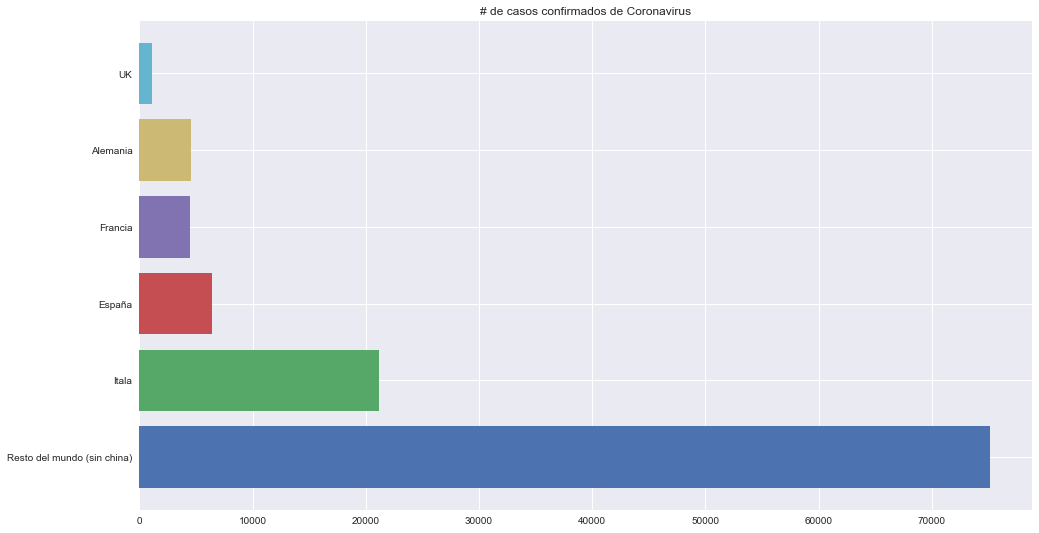

In [22]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
spain_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Spain'].sum()
italy_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Italy'].sum()
germany_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Germany'].sum()
france_confirmed = latest_confirmed[confirmed_df['Country/Region']=='France'].sum()
united_kingdom_confirmed = latest_confirmed[confirmed_df['Country/Region']=='United Kingdom'].sum()
plt.figure(figsize=(16, 9))
plt.barh('Resto del mundo (sin china)', outside_mainland_china_confirmed)
plt.barh('Itala', italy_confirmed)
plt.barh('España', spain_confirmed)
plt.barh('Francia', france_confirmed)
plt.barh('Alemania', germany_confirmed)
plt.barh('UK',united_kingdom_confirmed)
plt.title('# de casos confirmados de Coronavirus')
plt.show()

In [23]:

print('China:           {} casos'.format(china_confirmed))
print('Resto del mundo: {} casos, de los cuales:'.format(outside_mainland_china_confirmed))
print('   -Italia:      {} casos'.format(italy_confirmed))
print('   -España:      {} casos'.format(spain_confirmed))
print('   -Francia:     {} casos'.format(france_confirmed))
print('   -Alemania:    {} casos'.format(germany_confirmed))
print('   -UK:          {} cases'.format(united_kingdom_confirmed))

China:           80977 casos
Resto del mundo: 75125 casos, de los cuales:
   -Italia:      21157 casos
   -España:      6391 casos
   -Francia:     4480 casos
   -Alemania:    4585 casos
   -UK:          1143 cases


## Representaciones visuales para el mundo (barras y tartas)

In [24]:
# Mostramos los diez mayores, resto agrupamos
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

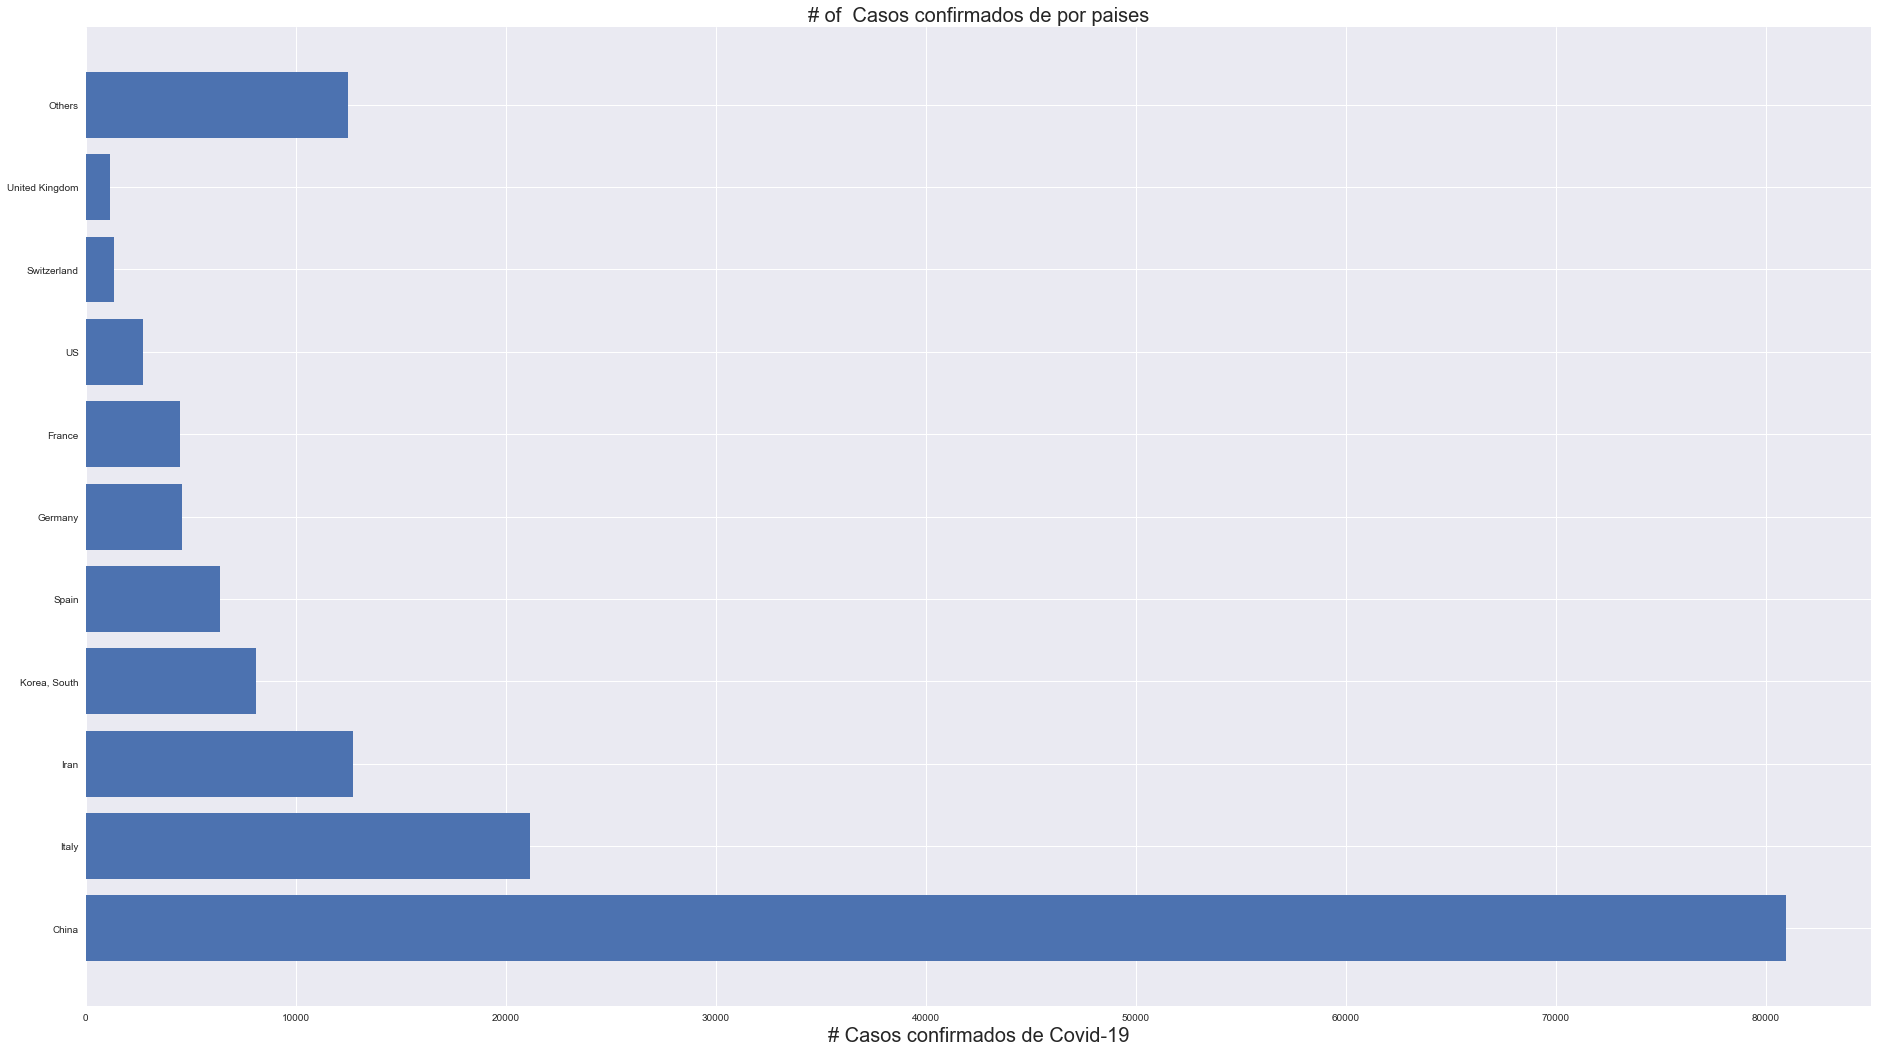

In [25]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of  Casos confirmados de por paises', size=20)
plt.xlabel('# Casos confirmados de Covid-19', size=20)
plt.show()

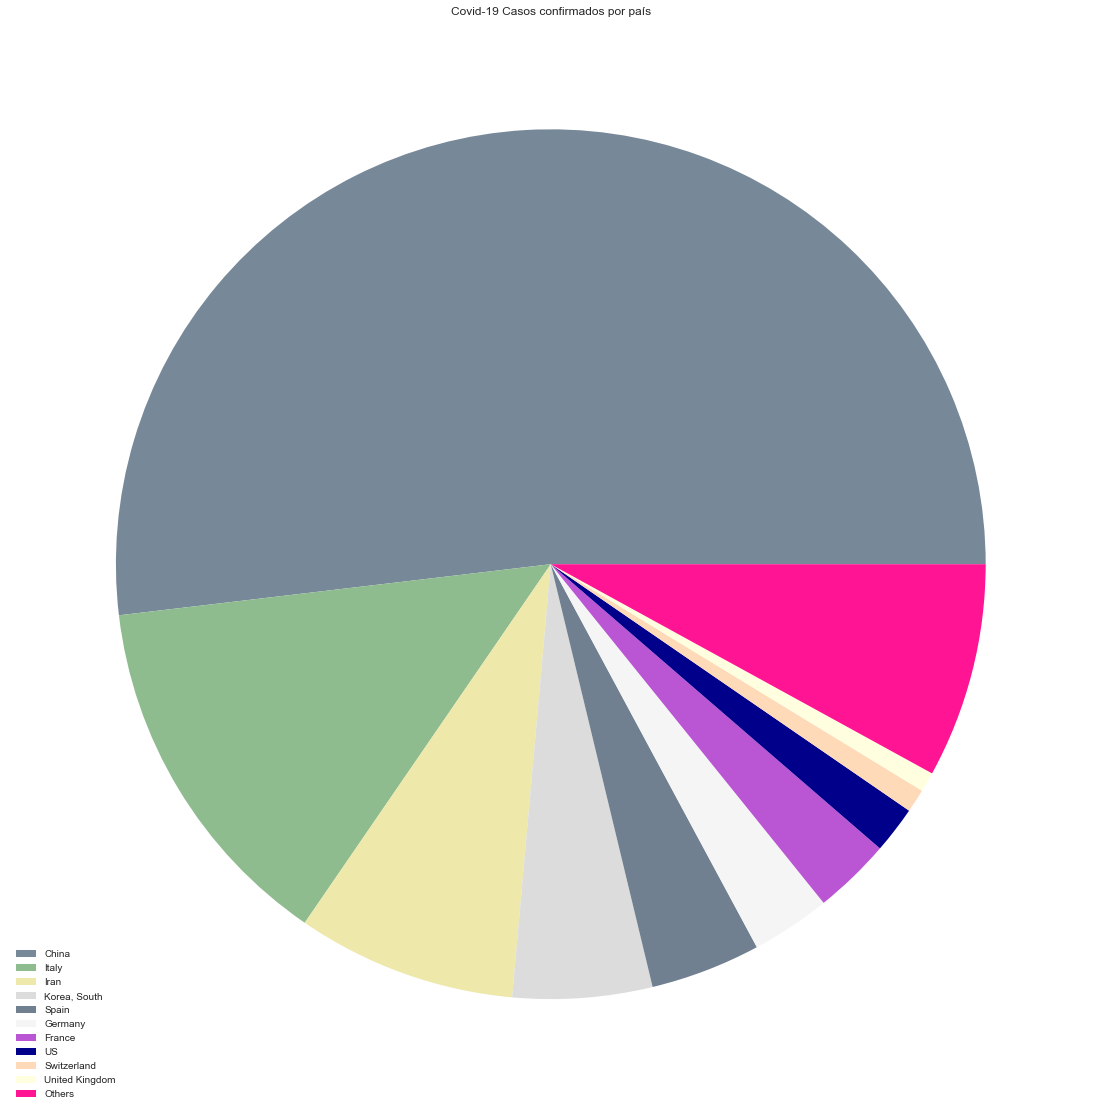

In [26]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados por país')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

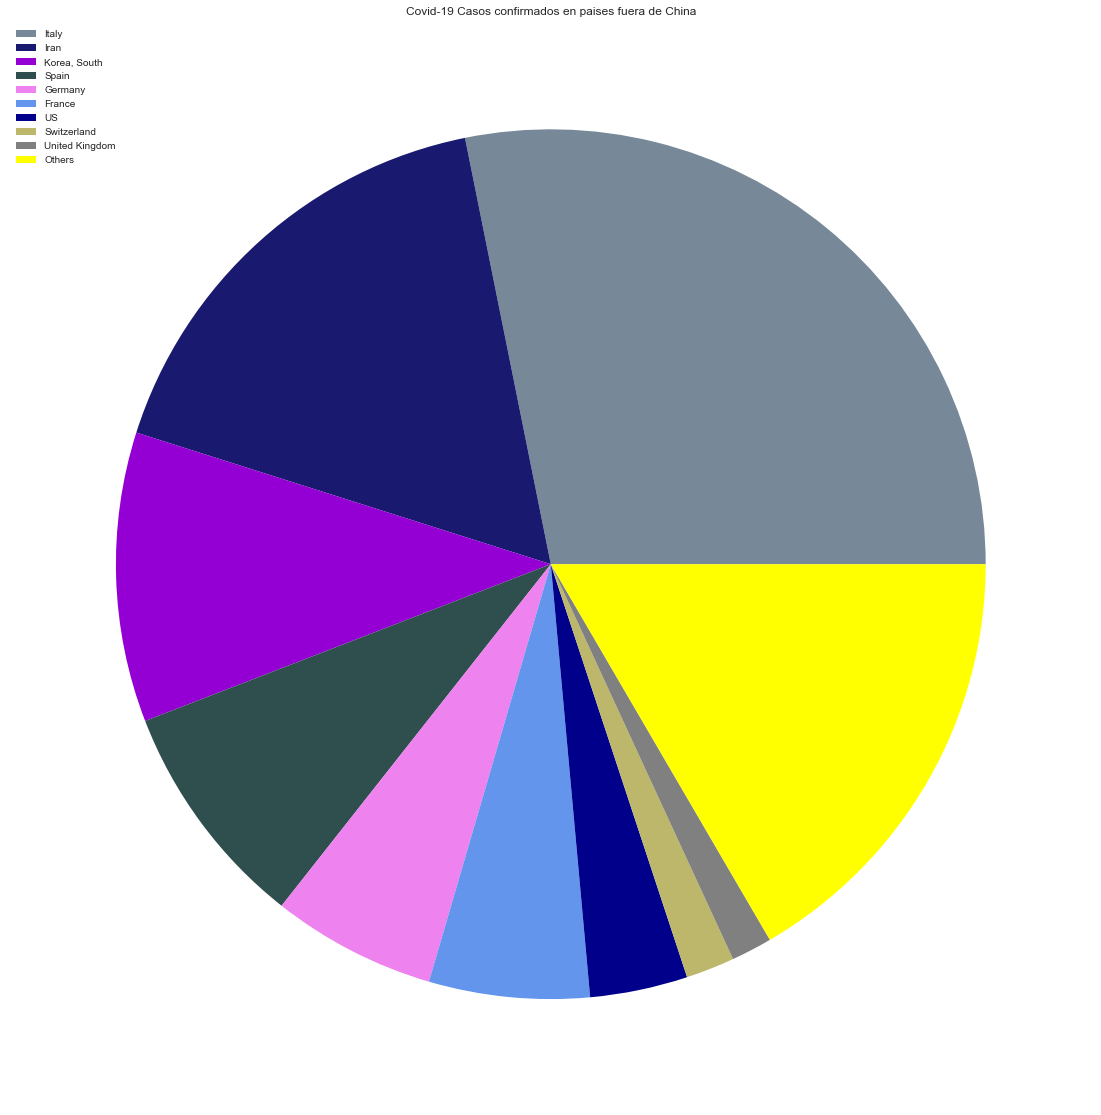

In [27]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en paises fuera de China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [28]:
us_regions = list(confirmed_df[confirmed_df['Country/Region']=='US']['Province/State'].unique())
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)

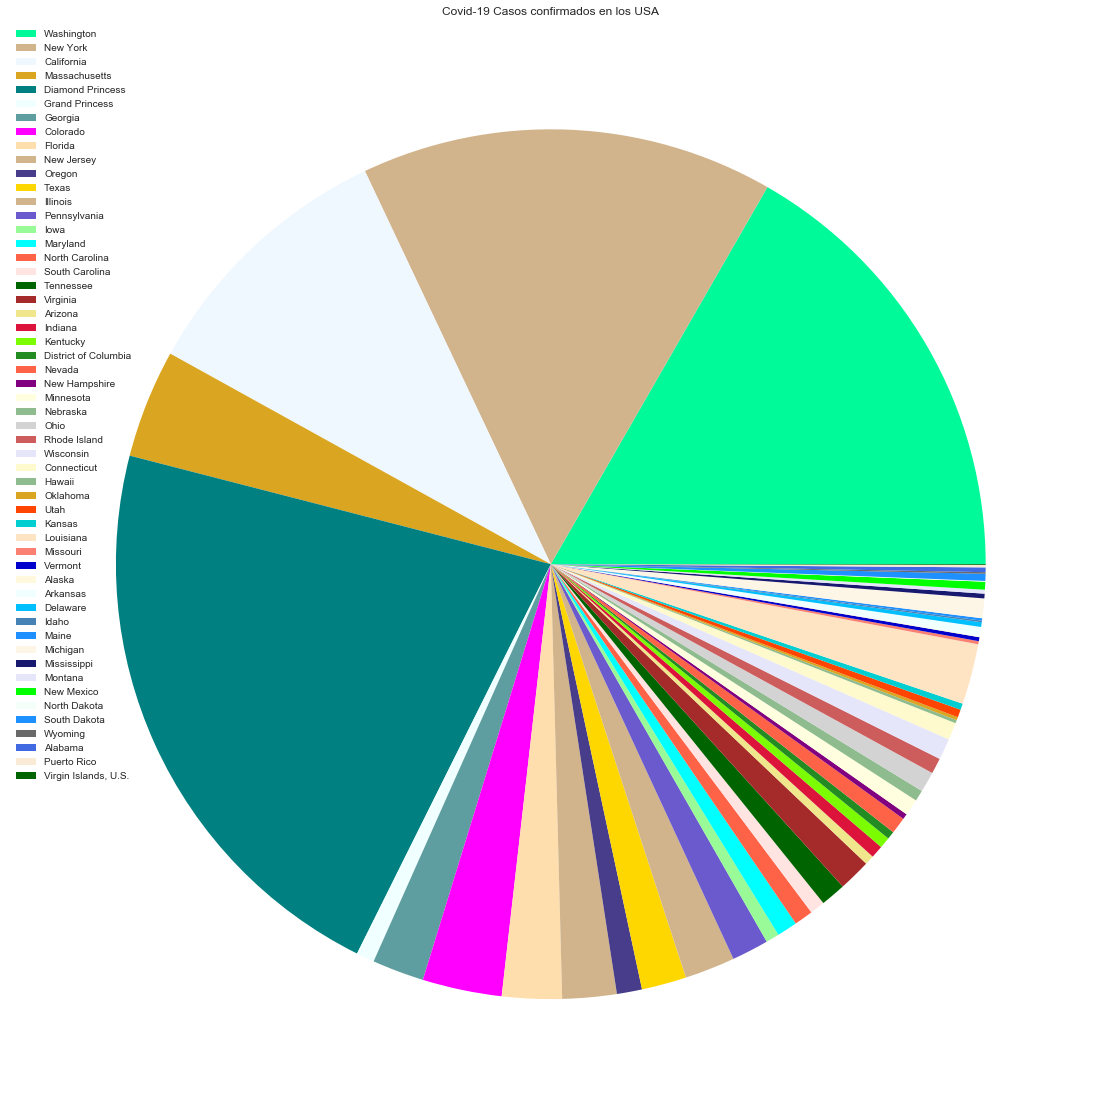

In [29]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en los USA')
plt.pie(us_confirmed_cases, colors=c)
plt.legend(us_regions, loc='best')
plt.show()